In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation



In [69]:
DATASET = "candidatos_trabajo.csv"
K_CLUSTERS = 3

df = pd.read_csv(DATASET)
df.head()

,experiencia,puntaje_prueba_tecnica,label
0,1.248357,38.617357,0
1,1.323844,55.230299,0
2,0.882923,37.658630,0
3,1.789606,47.674347,0
4,0.765263,45.425600,0


label 0 = rechazar  //  
label 1 = considerar    //  
label 2 = aceptar

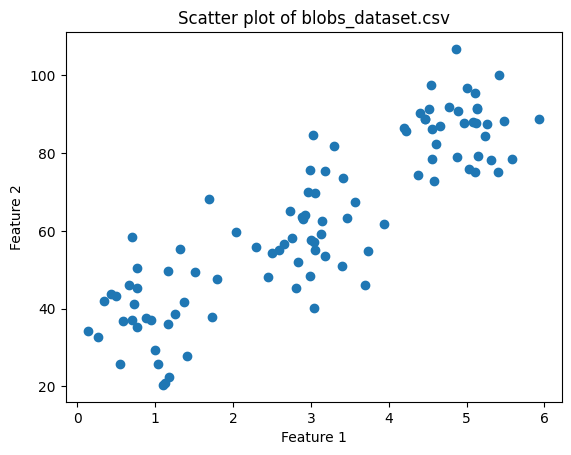

In [ ]:

plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of blobs_dataset.csv')
plt.show()

In [71]:
df['cluster'] = -1

In [72]:
df.head()

,experiencia,puntaje_prueba_tecnica,label,cluster
0,1.248357,38.617357,0,-1
1,1.323844,55.230299,0,-1
2,0.882923,37.658630,0,-1
3,1.789606,47.674347,0,-1
4,0.765263,45.425600,0,-1


In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['experiencia', 'puntaje_prueba_tecnica']] = scaler.fit_transform(df[['experiencia', 'puntaje_prueba_tecnica']])
df.head()

,experiencia,puntaje_prueba_tecnica,label,cluster
0,0.191674,0.210913,0,-1
1,0.204699,0.403286,0,-1
2,0.128617,0.199811,0,-1
3,0.285068,0.315790,0,-1
4,0.108315,0.289751,0,-1


In [74]:
# Colores para clústeres
cluster_colors = ['red', 'green', 'blue']
light_colors = ['lightcoral', 'lightgreen', 'lightblue']


frames = []  # Aquí guardamos un frame por cada instancia evaluada

In [75]:
# Parámetros
max_iter = 100
min_changes = int(0.01 * len(df))

np.random.seed(42)
initial_indices = np.random.choice(df.index, K_CLUSTERS, replace=False)
centroids = df.loc[initial_indices, ['experiencia', 'puntaje_prueba_tecnica']].reset_index(drop=True)

for iteration in range(max_iter):
    cambios = 0
    for idx in df.index:
        row = df.loc[idx]
        point = row[['experiencia', 'puntaje_prueba_tecnica']].to_numpy(dtype=float)
        distances = np.linalg.norm(centroids.values - point, axis=1)
        closest_centroid = np.argmin(distances)

        if df.at[idx, 'cluster'] != closest_centroid:
            cambios += 1
        df.at[idx, 'cluster'] = closest_centroid
        
        # Guardar frame solo cada 4 iteraciones
        if iteration % 4 == 0:
            frames.append((df[['experiencia', 'puntaje_prueba_tecnica', 'cluster']].copy(), centroids.copy(), idx))
        
        # Guardar frame después de clasificar este punto
        #frames.append((df[['feature_1', 'feature_2', 'classification']].copy(), centroids.copy(), idx))

    # Actualizar centroides después de revisar todos los puntos
    for k in range(K_CLUSTERS):
        cluster_points = df[df['cluster'] == k][['experiencia', 'puntaje_prueba_tecnica']]
        if not cluster_points.empty:
            centroids.loc[k] = cluster_points.mean().values

    if cambios < min_changes:
        break


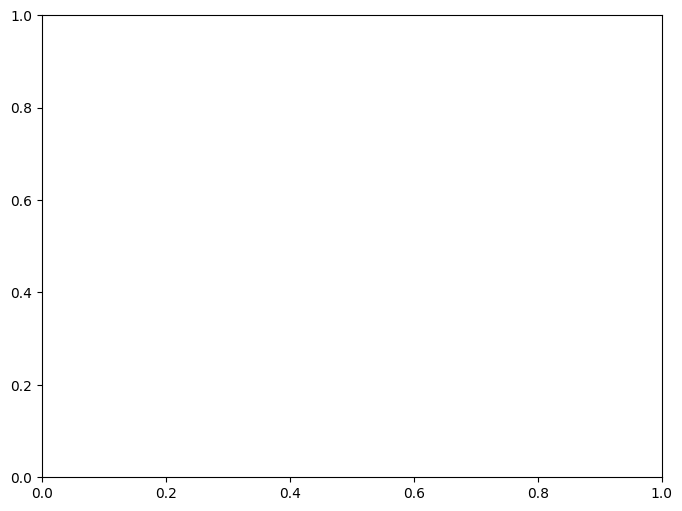

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    data, centroids, current_idx = frame
    ax.clear()

    # Dibujar todos los puntos ya clasificados
    for k in range(K_CLUSTERS):
        points = data[(data['cluster'] == k) & (data.index <= current_idx)]
        ax.scatter(points['experiencia'], points['puntaje_prueba_tecnica'], 
                   c=cluster_colors[k], alpha=0.5, label=f'Cluster {k}')

    # Dibujar puntos aún sin clasificar (index > actual)
    unclassified = data[(data['cluster'] == -1) | (data.index > current_idx)]
    if not unclassified.empty:
        ax.scatter(unclassified['experiencia'], unclassified['puntaje_prueba_tecnica'], 
                   c='gray', alpha=0.3, label='Sin clasificar')

    # Dibujar centroides
    for k in range(K_CLUSTERS):
        c = centroids.loc[k]
        ax.scatter(c.iloc[0], c.iloc[1], c=cluster_colors[k], marker='*', s=250, edgecolor='black')


    ax.set_title(f"K-Means - Evaluando instancia {current_idx}")
    ax.legend(loc='upper right')


In [77]:
ani = FuncAnimation(fig, update, frames=frames, interval=50, repeat=False)
plt.show()


In [78]:

ani.save("kmeans_step_by_step2.gif", writer="pillow")


In [79]:
# Desnormalizar los datos usando el inverso del MinMaxScaler
df_desnormalizado = df.copy()
df_desnormalizado[['experiencia', 'puntaje_prueba_tecnica']] = scaler.inverse_transform(
    df[['experiencia', 'puntaje_prueba_tecnica']]
)
df_desnormalizado.head()

,experiencia,puntaje_prueba_tecnica,label,cluster
0,1.248357,38.617357,0,1
1,1.323844,55.230299,0,1
2,0.882923,37.658630,0,1
3,1.789606,47.674347,0,1
4,0.765263,45.425600,0,1


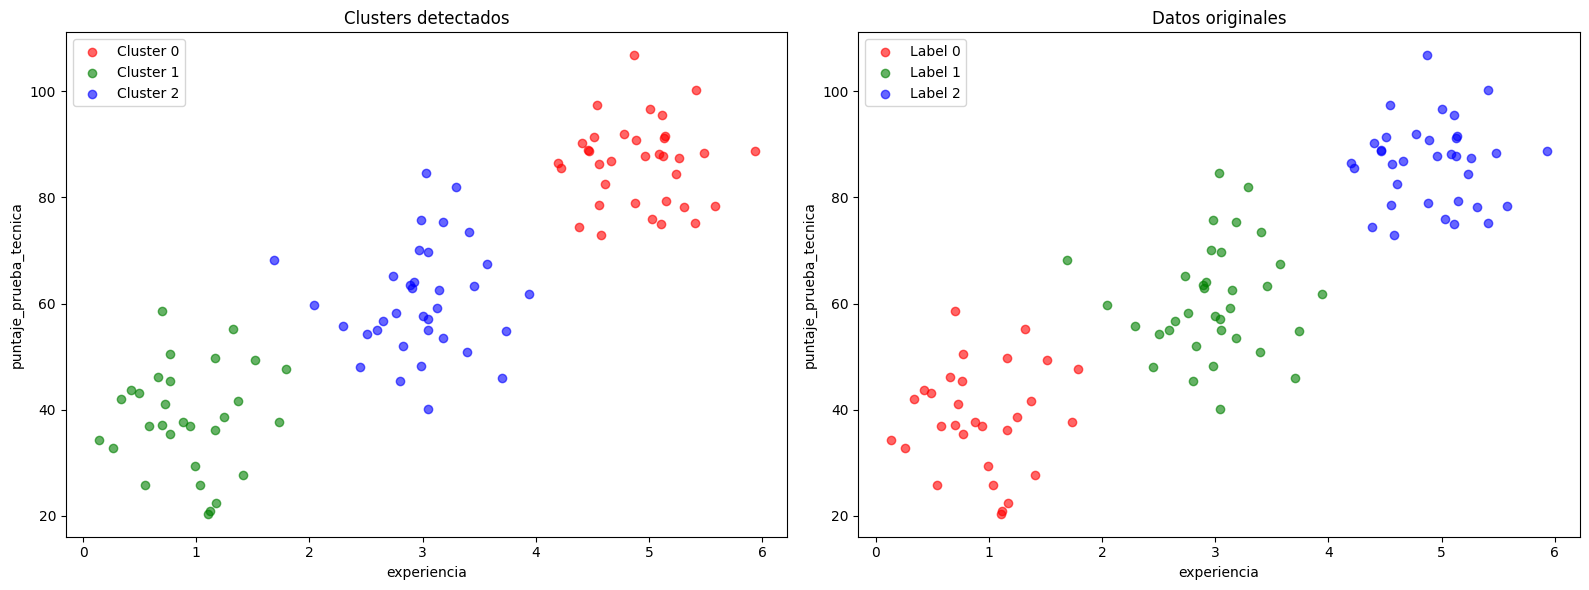

In [82]:
colors = {0: 'red', 1: 'green', 2: 'blue'}
plt.figure(figsize=(16, 6))

# Clusters por clasificación
plt.subplot(1, 2, 1)
for c in range(K_CLUSTERS):
    cluster =df_desnormalizado[df_desnormalizado['cluster'] == c]
    plt.scatter(cluster['experiencia'], cluster['puntaje_prueba_tecnica'],
                color=colors[c], label=f'Cluster {c}', alpha=0.6)
plt.xlabel('experiencia')
plt.ylabel('puntaje_prueba_tecnica')
plt.title('Clusters detectados')
plt.legend()

# Datos originales por label
plt.subplot(1, 2, 2)
for c in range(K_CLUSTERS):
    cluster = df_desnormalizado[df_desnormalizado['label'] == c]
    plt.scatter(cluster['experiencia'], cluster['puntaje_prueba_tecnica'],
                color=colors[c], label=f'Label {c}', alpha=0.6)
plt.xlabel('experiencia')
plt.ylabel('puntaje_prueba_tecnica')
plt.title('Datos originales')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
# esta metrica esta mal por que los clusteres no necesariamente corresponden a las etiquetas
accuracy = (df['label'] == df['cluster']).sum() / len(df)
print(f"Porcentaje de aciertos: {accuracy * 100:.2f}%")


# Para evaluar la calidad del clustering podemos usar ARI (Adjusted Rand Index)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(df['label'], df['cluster'])    
print(f"ARI: {ari * 100:.2f}%")

Porcentaje de aciertos: 0.00%
ARI: 100.00%
